In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import StratifiedKFold
import category_encoders

In [2]:
train_data = pd.read_csv('./train_dataset/train_public.csv')
test_public = pd.read_csv('./test_public.csv')
train_internet = pd.read_csv('./train_dataset/train_internet.csv')

In [3]:
train_data.shape

(10000, 39)

In [4]:
X_train = train_data.copy()
X_test = test_public.copy()

In [5]:
X_train = X_train.drop(['isDefault'], axis = 1)
class, employer_type, industry, work_year, issue_date, earlies_credit_mon, issue_date_cnt, earlies_credit_mon_cnt
X_train.shape

(10000, 38)

In [6]:
X_train['is_train'] = 1
X_test['is_train'] = 0

X_traintest = X_traintest = pd.concat([X_train, X_test], axis = 0)
X_traintest.shape

(15000, 39)

### 数据探索 

In [7]:
X_traintest.head(39)

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,...,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,is_train
0,1040418,240418,31818.181820,3,11.466,1174.91,C,政府机构,金融业,3 years,...,1,1.0,0.0,4.0,5.0,4.0,3,9927,0.0,1
1,1025197,225197,28000.000000,5,16.841,670.69,C,政府机构,金融业,10+ years,...,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,1
2,1009360,209360,17272.727270,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,...,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,1
3,1039708,239708,20000.000000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,...,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,1
4,1027483,227483,15272.727270,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,...,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,1
5,1047529,247529,25454.545450,3,10.637,899.15,B,幼教与中小学校,信息传输、软件和信息技术服务业,10+ years,...,1,6.0,0.0,6.0,20.0,15.0,0,0,0.0,1
6,1030964,230964,9090.909091,5,15.741,234.30,C,高等教育机构,金融业,10+ years,...,1,4.0,0.0,9.0,25.0,6.0,0,0,0.0,1
7,1024822,224822,10288.636360,3,11.490,414.62,B,普通企业,制造业,2 years,...,1,4.0,0.0,0.0,9.0,9.0,0,0,0.0,1
8,1008720,208720,6818.181818,3,20.064,272.05,D,普通企业,金融业,NaN,...,1,6.0,0.0,2.0,34.0,22.0,0,0,0.0,1
9,1045305,245305,10800.000000,3,14.330,339.95,C,幼教与中小学校,住宿和餐饮业,4 years,...,1,3.0,0.0,15.0,6.0,6.0,0,0,0.0,1


In [8]:
X_traintest.columns

Index(['loan_id', 'user_id', 'total_loan', 'year_of_loan', 'interest',
       'monthly_payment', 'class', 'employer_type', 'industry', 'work_year',
       'house_exist', 'censor_status', 'issue_date', 'use', 'post_code',
       'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low',
       'scoring_high', 'known_outstanding_loan', 'known_dero',
       'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status',
       'app_type', 'earlies_credit_mon', 'title', 'policy_code', 'f0', 'f1',
       'f2', 'f3', 'f4', 'early_return', 'early_return_amount',
       'early_return_amount_3mon', 'is_train'],
      dtype='object')

In [9]:
X_traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4999
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   15000 non-null  int64  
 1   user_id                   15000 non-null  int64  
 2   total_loan                15000 non-null  float64
 3   year_of_loan              15000 non-null  int64  
 4   interest                  15000 non-null  float64
 5   monthly_payment           15000 non-null  float64
 6   class                     15000 non-null  object 
 7   employer_type             15000 non-null  object 
 8   industry                  15000 non-null  object 
 9   work_year                 14100 non-null  object 
 10  house_exist               15000 non-null  int64  
 11  censor_status             15000 non-null  int64  
 12  issue_date                15000 non-null  object 
 13  use                       15000 non-null  int64  
 14  post_co

In [10]:
print(f'There are {X_traintest.isnull().any().sum()} columns in train dataset with missing values.')

There are 7 columns in train dataset with missing values.


In [11]:
have_null_fea_dict = (X_traintest.isnull().sum()/len(X_traintest)).to_dict() 
fea_null_moreThanThreshold = {} 
for key,value in have_null_fea_dict.items(): 
    if value > 0.4: 
        fea_null_moreThanThreshold[key] = value
fea_null_moreThanThreshold

{}

<AxesSubplot:>

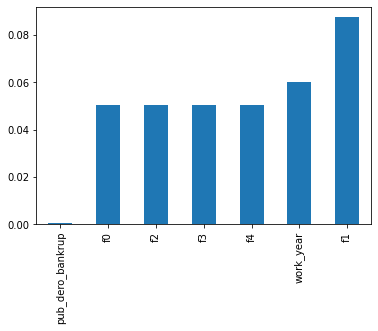

In [12]:
missing = X_traintest.isnull().sum()/len(X_traintest) 
missing = missing[missing > 0] 
missing.sort_values(inplace=True) 
missing.plot.bar()

In [13]:
one_value_fea = [col for col in X_traintest.columns if X_traintest[col].nunique() <= 1]
print(one_value_fea)
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.') 

['policy_code']
There are 1 columns in train dataset with one unique value.


In [14]:
X_traintest = X_traintest.drop('loan_id', axis=1)

X_traintest = X_traintest.drop('user_id', axis=1)

X_traintest = X_traintest.drop(one_value_fea, axis=1)

In [15]:
numerical_fea = list(X_traintest.select_dtypes(exclude=['object']).columns) 
category_fea = list(filter(lambda x: x not in numerical_fea,list(X_traintest.columns)))
print("numerical_fea:",numerical_fea)
print("category_fea:",category_fea)

numerical_fea: ['total_loan', 'year_of_loan', 'interest', 'monthly_payment', 'house_exist', 'censor_status', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status', 'app_type', 'title', 'f0', 'f1', 'f2', 'f3', 'f4', 'early_return', 'early_return_amount', 'early_return_amount_3mon', 'is_train']
category_fea: ['class', 'employer_type', 'industry', 'work_year', 'issue_date', 'earlies_credit_mon']


In [16]:
def get_numerical_serial_fea(data,feas): 
    numerical_serial_fea = [] 
    numerical_noserial_fea = [] 
    for fea in feas: 
        temp = data[fea].nunique() 
        if temp <= 10: 
            numerical_noserial_fea.append(fea) 
            continue 
        numerical_serial_fea.append(fea) 
    return numerical_serial_fea,numerical_noserial_fea 
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(X_traintest,numerical_fea)
print("numerical_fea中的numerical_serial_fea:",numerical_serial_fea)
print("numerical_fea中的numerical_noserial_fea:",numerical_noserial_fea)

numerical_fea中的numerical_serial_fea: ['total_loan', 'interest', 'monthly_payment', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'recircle_b', 'recircle_u', 'title', 'f0', 'f2', 'f3', 'f4', 'early_return_amount', 'early_return_amount_3mon']
numerical_fea中的numerical_noserial_fea: ['year_of_loan', 'house_exist', 'censor_status', 'pub_dero_bankrup', 'initial_list_status', 'app_type', 'f1', 'early_return', 'is_train']


### 特征工程 

#### work_year, class 

In [17]:
work_year_dict = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

# train_data['work_year'] = train_data['work_year'].map(work_year_dict)
# test_public['work_year'] = test_public['work_year'].map(work_year_dict)
# train_data['work_year'] = train_data['work_year'].fillna(-1)
# test_public['work_year'] = test_public['work_year'].fillna(-1)
# train_internet['work_year'] = train_internet['work_year'].map(work_year_dict)
# train_internet['work_year'] = train_internet['work_year'].fillna(-1)

X_traintest['num_work_year'] = X_traintest['work_year'].map(work_year_dict)

In [18]:
class_dict = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7,
}

# train_data['class'] = train_data['class'].map(class_dict)
# test_public['class'] = test_public['class'].map(class_dict)
# train_internet['class'] = train_internet['class'].map(class_dict)

X_traintest['num_class'] = X_traintest['class'].map(class_dict)

#### issue_date, earlies_credit_mon

In [19]:
# train_data['issue_date'] = pd.to_datetime(train_data['issue_date'])
# test_public['issue_date'] = pd.to_datetime(test_public['issue_date'])
# train_internet['issue_date'] = pd.to_datetime(train_internet['issue_date'])

# train_data['issue_date_month'] = train_data['issue_date'].dt.month
# test_public['issue_date_month'] = train_data['issue_date'].dt.month
# train_internet['issue_date_month'] = train_internet['issue_date'].dt.month

# train_data['issue_date_dayofweek'] = train_data['issue_date'].dt.dayofweek
# test_public['issue_date_dayofweek'] = train_data['issue_date'].dt.dayofweek
# train_internet['issue_date_dayofweek'] = train_internet['issue_date'].dt.dayofweek

X_traintest['issue_date'] = pd.to_datetime(X_traintest['issue_date'])

X_traintest['issue_date_month'] = X_traintest['issue_date'].dt.month

X_traintest['issue_date_dayofweek'] = X_traintest['issue_date'].dt.dayofweek

X_traintest['issue_date_delta'] = (X_traintest['issue_date'] - X_traintest['issue_date'].min())  / np.timedelta64(1,'D')

In [20]:
X_traintest['earlies_credit_mon'] = pd.to_datetime(X_traintest['earlies_credit_mon'])

X_traintest['earlies_credit_mon_delta'] = (X_traintest['earlies_credit_mon'] - X_traintest['earlies_credit_mon'].min())  / np.timedelta64(1,'D')

In [21]:
X_traintest['earlies_credit_Mon'] = X_traintest['earlies_credit_mon'].dt.month

X_traintest['earlies_credit_Year'] = X_traintest['earlies_credit_mon'].dt.year

X_traintest['earlies_credit_dayofweek'] = X_traintest['earlies_credit_mon'].dt.dayofweek

In [22]:
X_traintest['earlies_credit_Mon']

0       12
1        4
2       10
3        6
4        5
        ..
4995     7
4996     4
4997    10
4998     3
4999     7
Name: earlies_credit_Mon, Length: 15000, dtype: int64

#### employer_type, industry

In [23]:
from sklearn.preprocessing import LabelEncoder


lbl1 = LabelEncoder().fit(X_traintest['employer_type'])
X_traintest['num_employer_type'] = lbl1.transform(X_traintest['employer_type'])

lbl2 = LabelEncoder().fit(X_traintest['industry'])
X_traintest['num_industry'] = lbl2.transform(X_traintest['industry'])


In [24]:
X_traintest['num_industry']

0       13
1       13
2        3
3       10
4        2
        ..
4995     2
4996     8
4997     8
4998    10
4999     0
Name: num_industry, Length: 15000, dtype: int32

#### Internet表补充 

In [25]:
# tr_cols = set(train_data.columns)
# same_col = list(tr_cols.intersection(set(train_internet.columns)))
# train_inteSame = train_internet[same_col].copy()

# Inte_add_cos = list(tr_cols.difference(set(same_col)))
# for col in Inte_add_cos:
#     train_inteSame[col] = np.nan

#### Counts 

In [25]:
X_traintest['house_exist'] 

0       0
1       0
2       1
3       0
4       2
       ..
4995    1
4996    1
4997    0
4998    0
4999    1
Name: house_exist, Length: 15000, dtype: int64

In [26]:
features = X_traintest.columns

In [27]:
for cat in features:
    X_traintest[cat+'_cnt'] = category_encoders.count.CountEncoder().fit_transform(X_traintest[cat])

In [28]:
one_value_fea = [col for col in X_traintest.columns if X_traintest[col].nunique() <= 1]
print(one_value_fea)
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.') 

[]
There are 0 columns in train dataset with one unique value.


#### 数值型特征，分类型特征 

In [29]:
numerical_fea = list(X_traintest.select_dtypes(exclude=['object']).columns) 
category_fea = list(filter(lambda x: x not in numerical_fea,list(X_traintest.columns)))
print("numerical_fea:",numerical_fea)
print("category_fea:",category_fea)

numerical_fea: ['total_loan', 'year_of_loan', 'interest', 'monthly_payment', 'house_exist', 'censor_status', 'issue_date', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status', 'app_type', 'earlies_credit_mon', 'title', 'f0', 'f1', 'f2', 'f3', 'f4', 'early_return', 'early_return_amount', 'early_return_amount_3mon', 'is_train', 'num_work_year', 'num_class', 'issue_date_month', 'issue_date_dayofweek', 'issue_date_delta', 'earlies_credit_mon_delta', 'earlies_credit_Mon', 'earlies_credit_Year', 'earlies_credit_dayofweek', 'num_employer_type', 'num_industry', 'total_loan_cnt', 'year_of_loan_cnt', 'interest_cnt', 'monthly_payment_cnt', 'class_cnt', 'employer_type_cnt', 'industry_cnt', 'work_year_cnt', 'house_exist_cnt', 'censor_status_cnt', 'issue_date_cnt', 'use_cnt', 'post_code_cnt', 'region_cnt', 'debt_loan_ratio_cnt', 'del_in_18month_c

In [30]:
X_traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 4999
Data columns (total 94 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_loan                    15000 non-null  float64       
 1   year_of_loan                  15000 non-null  int64         
 2   interest                      15000 non-null  float64       
 3   monthly_payment               15000 non-null  float64       
 4   class                         15000 non-null  object        
 5   employer_type                 15000 non-null  object        
 6   industry                      15000 non-null  object        
 7   work_year                     14100 non-null  object        
 8   house_exist                   15000 non-null  int64         
 9   censor_status                 15000 non-null  int64         
 10  issue_date                    15000 non-null  datetime64[ns]
 11  use                          

In [31]:
numerical_fea.remove('issue_date')
numerical_fea.remove('earlies_credit_mon')
numerical_fea.remove('issue_date_cnt')
numerical_fea.remove('earlies_credit_mon_cnt')

category_fea.append('issue_date')
category_fea.append('earlies_credit_mon')
category_fea.append('issue_date_cnt')
category_fea.append('earlies_credit_mon_cnt')

In [32]:

print("numerical_fea:",numerical_fea)
print("category_fea:",category_fea)

numerical_fea: ['total_loan', 'year_of_loan', 'interest', 'monthly_payment', 'house_exist', 'censor_status', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status', 'app_type', 'title', 'f0', 'f1', 'f2', 'f3', 'f4', 'early_return', 'early_return_amount', 'early_return_amount_3mon', 'is_train', 'num_work_year', 'num_class', 'issue_date_month', 'issue_date_dayofweek', 'issue_date_delta', 'earlies_credit_mon_delta', 'earlies_credit_Mon', 'earlies_credit_Year', 'earlies_credit_dayofweek', 'num_employer_type', 'num_industry', 'total_loan_cnt', 'year_of_loan_cnt', 'interest_cnt', 'monthly_payment_cnt', 'class_cnt', 'employer_type_cnt', 'industry_cnt', 'work_year_cnt', 'house_exist_cnt', 'censor_status_cnt', 'use_cnt', 'post_code_cnt', 'region_cnt', 'debt_loan_ratio_cnt', 'del_in_18month_cnt', 'scoring_low_cnt', 'scoring_high_cnt', 'known_out

In [41]:
drop_features = ['class', 'employer_type', 'industry', 'work_year', 'issue_date', 'earlies_credit_mon', 'issue_date_cnt', 'earlies_credit_mon_cnt']
for cat in drop_features:
    X_traintest = X_traintest.drop(cat, axis=1)

### 模型 

In [42]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgbm
import catboost

In [43]:
all_fea = X_traintest.columns

In [44]:
X_train = X_traintest[X_traintest.is_train == 1][all_fea]
y_train = train_data['isDefault']

X_test = X_traintest[X_traintest.is_train == 0][all_fea]

In [45]:
X_train[category_fea] = X_train[category_fea].astype(str)
X_test[category_fea] = X_test[category_fea].astype(str)

X_train[numerical_fea] = X_train[numerical_fea].astype(float)
X_test[numerical_fea] = X_test[numerical_fea].astype(float)

KeyError: "None of [Index(['class', 'employer_type', 'industry', 'work_year', 'issue_date',\n       'earlies_credit_mon', 'issue_date_cnt', 'earlies_credit_mon_cnt'],\n      dtype='object')] are in the [columns]"

In [46]:
# model = catboost.CatBoostClassifier(cat_features = category_fea, random_state = 2080)
model = lgbm.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                            is_unbalance=True, learning_rate = 0.1,
                            n_jobs = -1, num_iterations=117, random_state = 50)
model.fit(X_train, y_train, verbose=400)

c:\users\legion\appdata\local\programs\python\python37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(is_unbalance=True, n_estimators=10000, num_iterations=117,
               objective='binary', random_state=50)

In [47]:
y_pred = model.predict_proba(X_test)

In [50]:
submission = pd.read_csv('./submit_example.csv')
submission['isDefault'] =1-y_pred
submission.to_csv('./lgbm_v1.csv')